# **1- Conhecendo os dados**

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

In [3]:
arquivo_excel = pd.ExcelFile("/content/drive/MyDrive/Portfólio/dunnhumby _Breakfast-at-the-Frat/dunnhumby - Breakfast at the Frat.xlsx")

## **1.1 - data set lojas**

In [27]:
#extraindo as abas

lojas = pd.read_excel(arquivo_excel, sheet_name='dh Store Lookup', header=1)# index_col='STORE_ID'
lojas.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24766.807692,NaN,NaN,NaN,NaN,NaN,NaN
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54052.519231,NaN,NaN,NaN,NaN,NaN,NaN
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177.333333,NaN,NaN,NaN,NaN,NaN,NaN
3,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,NaN,50237,20620.423077,NaN,NaN,NaN,NaN,NaN,NaN
4,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,350.0,43698,24321.942308,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STORE_ID                 79 non-null     int64  
 1   STORE_NAME               79 non-null     object 
 2   ADDRESS_CITY_NAME        79 non-null     object 
 3   ADDRESS_STATE_PROV_CODE  79 non-null     object 
 4   MSA_CODE                 79 non-null     int64  
 5   SEG_VALUE_NAME           79 non-null     object 
 6   PARKING_SPACE_QTY        27 non-null     float64
 7   SALES_AREA_SIZE_NUM      79 non-null     int64  
 8   AVG_WEEKLY_BASKETS       79 non-null     float64
 9   Unnamed: 9               0 non-null      float64
 10  Unnamed: 10              0 non-null      float64
 11  Unnamed: 11              0 non-null      float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14              0 n

In [30]:
lojas.isna().sum() #as colunas de 8 a 13 estão vazias, portanto podemos excluí-las. Temos alguns valores faltantes mas cuidaremos disso depois

STORE_ID                    0
STORE_NAME                  0
ADDRESS_CITY_NAME           0
ADDRESS_STATE_PROV_CODE     0
MSA_CODE                    0
SEG_VALUE_NAME              0
PARKING_SPACE_QTY          52
SALES_AREA_SIZE_NUM         0
AVG_WEEKLY_BASKETS          0
Unnamed: 9                 79
Unnamed: 10                79
Unnamed: 11                79
Unnamed: 12                79
Unnamed: 13                79
Unnamed: 14                79
dtype: int64

In [31]:
lojas.drop(['Unnamed: 9', 'Unnamed: 10','Unnamed: 11','Unnamed: 12', 'Unnamed: 13','Unnamed: 14'], axis=1, inplace=True)

In [32]:
lojas.describe()

,STORE_ID,MSA_CODE,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
count,79.000000,79.000000,27.000000,79.000000,79.000000
mean,14502.468354,21236.202532,480.518519,49145.164557,24146.806232
std,8868.762031,6138.649376,403.659641,13512.452153,8720.396844
min,367.000000,13140.000000,17.000000,10788.000000,10434.705128
25%,6183.000000,17140.000000,282.000000,43067.500000,17522.432692
50%,15541.000000,19100.000000,351.000000,48594.000000,24567.750000
75%,23058.000000,26420.000000,488.500000,55200.500000,29186.262821
max,29159.000000,47540.000000,1859.000000,86517.000000,54052.519231


### **1.1.2 -Localização das lojas**

In [67]:
len(lojas.ADDRESS_CITY_NAME.unique()) # lojas espalhadas por 51 cidades

51

Text(0.5, 1.0, 'Quantidade de lojas em cada cidade')

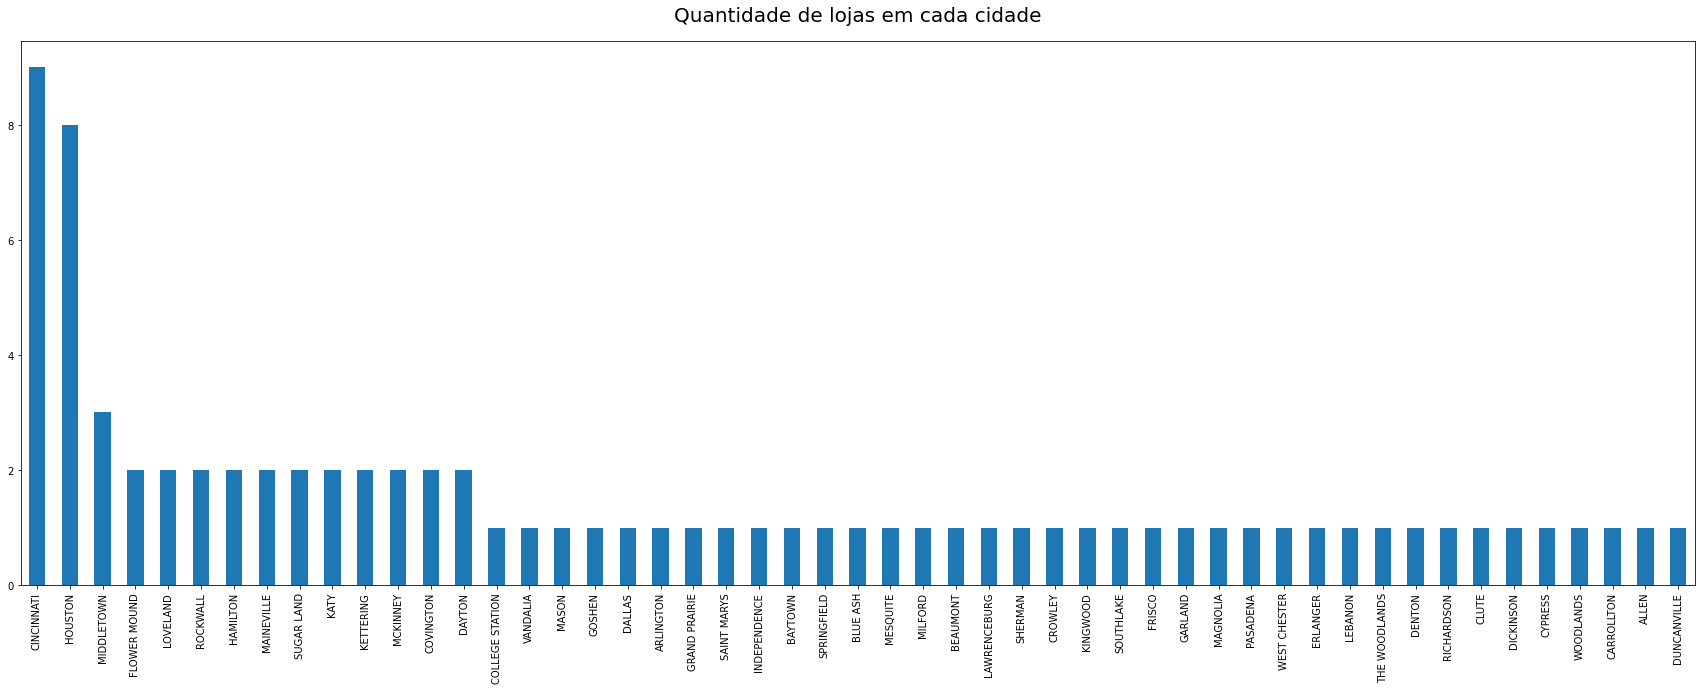

In [88]:
cidade = lojas.ADDRESS_CITY_NAME.value_counts()
ax= cidade.plot(kind='bar', figsize=(30,10))
ax.set_title('Quantidade de lojas em cada cidade', fontsize=20, pad=20)

Text(0.5, 1.0, 'Quantidade de lojas em cada Estado')

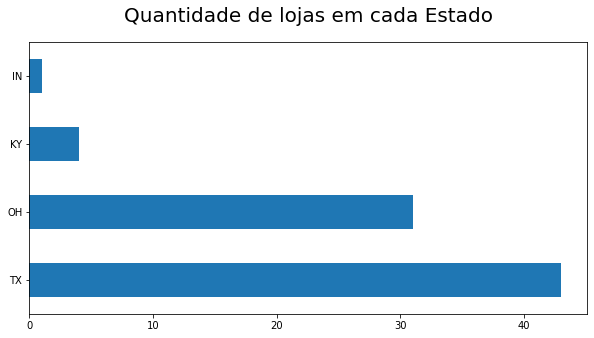

In [116]:
estados= lojas['ADDRESS_STATE_PROV_CODE'].value_counts()
ax= estados.plot(kind='barh', figsize=(10,5))
ax.set_title('Quantidade de lojas em cada Estado', fontsize=20, pad=20)


[Text(0, 0, 'Convencional'), Text(0, 0, 'Média'), Text(0, 0, 'Sofisticada')]

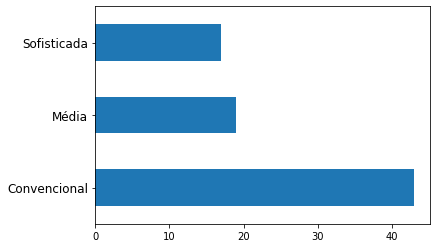

In [130]:
tipo_de_loja = lojas.SEG_VALUE_NAME.value_counts()
ax= tipo_de_loja.plot(kind='barh')
ax.set_yticklabels(['Convencional', 'Média','Sofisticada'], fontsize=12)


### **Tamanho das Lojas, Área do Estacionamento e Média de Cestos**

In [133]:
lojas[['PARKING_SPACE_QTY',"SALES_AREA_SIZE_NUM","AVG_WEEKLY_BASKETS"]].describe()

,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
count,27.000000,79.000000,79.000000
mean,480.518519,49145.164557,24146.806232
std,403.659641,13512.452153,8720.396844
min,17.000000,10788.000000,10434.705128
25%,282.000000,43067.500000,17522.432692
50%,351.000000,48594.000000,24567.750000
75%,488.500000,55200.500000,29186.262821
max,1859.000000,86517.000000,54052.519231


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83497bce90>,
      dtype=object)

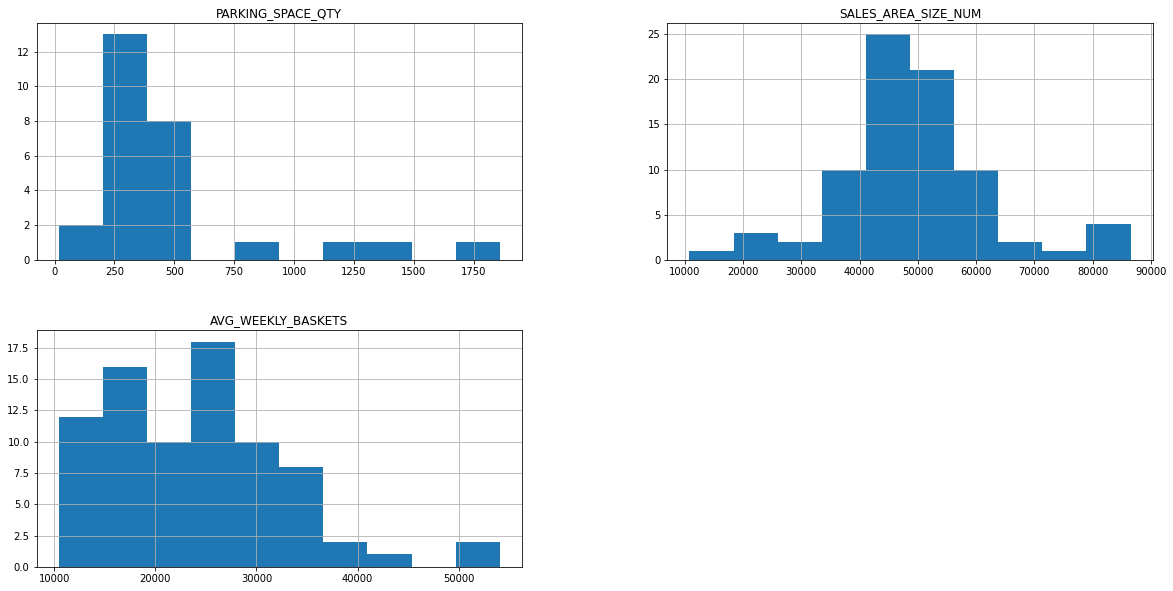

In [136]:
lojas[['PARKING_SPACE_QTY',"SALES_AREA_SIZE_NUM","AVG_WEEKLY_BASKETS"]].hist(figsize=(20,10))

Text(0.25, 0.04, 'Relação entre o Tipo de loja com a Média de Vendas Semanais e Tamanho da Loja')

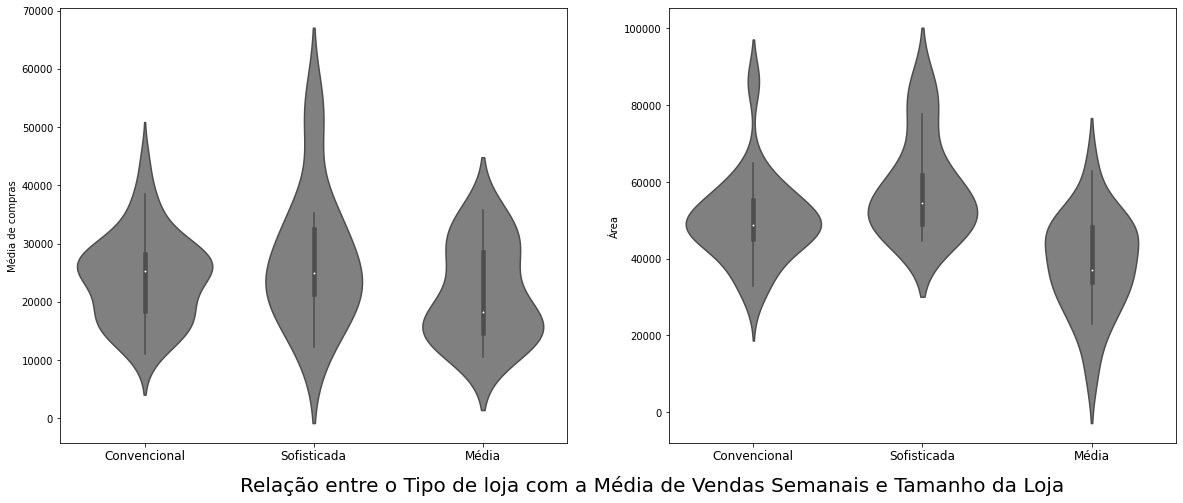

In [199]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8), sharex=True)

ax = sns.violinplot(x="SEG_VALUE_NAME", y="AVG_WEEKLY_BASKETS", data=lojas, ax=axis1, color='gray')
ax.set_xticklabels(['Convencional','Sofisticada', 'Média'], fontsize=12)
ax.set_xlabel(None)
ax.set_ylabel('Média de compras')

ax = sns.violinplot(x="SEG_VALUE_NAME", y="SALES_AREA_SIZE_NUM", data=lojas, ax=axis2, color='gray')
ax.set_xticklabels(['Convencional','Sofisticada', 'Média'], fontsize=12)
ax.set_xlabel(None)
ax.set_ylabel('Média de Vendas Semanais')
ax.set_ylabel('Área')




fig.text(0.25,0.04, 'Relação entre o Tipo de loja com a Média de Vendas Semanais e Tamanho da Loja', fontsize=20)


## **1.2 - dataset produtos**

In [35]:
produtos = pd.read_excel(arquivo_excel, sheet_name='dh Products Lookup', header=1)#  index_col='UPC'
produtos.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UPC           58 non-null     int64  
 1   DESCRIPTION   58 non-null     object 
 2   MANUFACTURER  58 non-null     object 
 3   CATEGORY      58 non-null     object 
 4   SUB_CATEGORY  58 non-null     object 
 5   PRODUCT_SIZE  58 non-null     object 
 6   Unnamed: 6    0 non-null      float64
 7   Unnamed: 7    0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
dtypes: float64(9), int64(1), object(5)
memory usage: 6.9+ KB


In [37]:
produtos.isna().sum() #as colunas não nomeadas estão com vazias. Portanto as excluíremos

UPC              0
DESCRIPTION      0
MANUFACTURER     0
CATEGORY         0
SUB_CATEGORY     0
PRODUCT_SIZE     0
Unnamed: 6      58
Unnamed: 7      58
Unnamed: 8      58
Unnamed: 9      58
Unnamed: 10     58
Unnamed: 11     58
Unnamed: 12     58
Unnamed: 13     58
Unnamed: 14     58
dtype: int64

In [38]:
produtos.drop(columns=['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9', 'Unnamed: 10','Unnamed: 11','Unnamed: 12', 'Unnamed: 13','Unnamed: 14'], inplace=True)

### **Tipos de Produtos**

In [185]:
print(f'Há {produtos.DESCRIPTION.unique().size} produtos divididos em {produtos.CATEGORY.unique().size} categorias.')      

Há 55 produtos divididos em 4 categorias.


Text(0.5, 1.0, 'Distribuição da Categoria de Produtos')

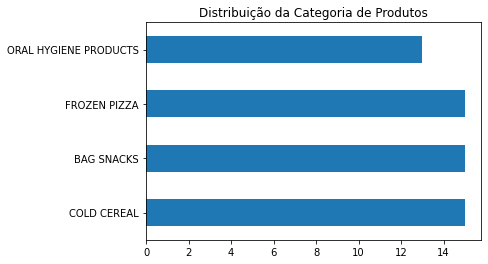

In [196]:
produtos.CATEGORY.value_counts().plot(kind='barh')
plt.title('Distribuição da Categoria de Produtos')

In [208]:
a.index

Index(['PRETZELS', 'PIZZA/PREMIUM', 'MOUTHWASHES (ANTISEPTIC)',
       'ALL FAMILY CEREAL', 'MOUTHWASH/RINSES AND SPRAYS', 'KIDS CEREAL',
       'ADULT CEREAL'],
      dtype='object')

Text(0.5, 1.0, 'Distribuição da Sub-Categoria de Produtos')

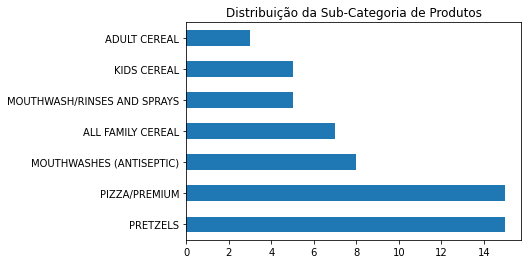

In [215]:
produtos.SUB_CATEGORY.value_counts().plot(kind='barh')
plt.title('Distribuição da Sub-Categoria de Produtos')

### Fabricantes e Fornecedores

In [218]:
produtos.groupby('MANUFACTURER')['CATEGORY'].value_counts()


[[MANUFACTURER   CATEGORY             
  CHATTEM        ORAL HYGIENE PRODUCTS    3
  COLGATE        ORAL HYGIENE PRODUCTS    1
  FRITO LAY      BAG SNACKS               3
  GENERAL MI     COLD CEREAL              3
  HOME RUN       FROZEN PIZZA             3
  KELLOGG        COLD CEREAL              3
  KING           FROZEN PIZZA             3
  MKSL           BAG SNACKS               3
  P & G          ORAL HYGIENE PRODUCTS    3
  POST FOODS     COLD CEREAL              3
  PRIVATE LABEL  BAG SNACKS               3
                 COLD CEREAL              3
                 FROZEN PIZZA             3
                 ORAL HYGIENE PRODUCTS    3
  QUAKER         COLD CEREAL              3
  SHULTZ         BAG SNACKS               3
  SNYDER S       BAG SNACKS               3
  TOMBSTONE      FROZEN PIZZA             3
  TONYS          FROZEN PIZZA             3
  WARNER         ORAL HYGIENE PRODUCTS    3
  Name: CATEGORY, dtype: int64]]

## **data set vendas**

In [40]:
vendas = pd.read_excel(arquivo_excel, sheet_name='dh Transaction Data', header=1)  #index_col='WEEK_END_DATE'
vendas.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2009-01-14,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1,NaN,NaN,NaN
1,2009-01-14,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0,NaN,NaN,NaN
2,2009-01-14,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0,NaN,NaN,NaN
3,2009-01-14,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1,NaN,NaN,NaN
4,2009-01-14,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0,NaN,NaN,NaN


In [41]:
vendas.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524950 entries, 0 to 524949
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   WEEK_END_DATE  524950 non-null  datetime64[ns]
 1   STORE_NUM      524950 non-null  int64         
 2   UPC            524950 non-null  int64         
 3   UNITS          524950 non-null  int64         
 4   VISITS         524950 non-null  int64         
 5   HHS            524950 non-null  int64         
 6   SPEND          524950 non-null  float64       
 7   PRICE          524927 non-null  float64       
 8   BASE_PRICE     524765 non-null  float64       
 9   FEATURE        524950 non-null  int64         
 10  DISPLAY        524950 non-null  int64         
 11  TPR_ONLY       524950 non-null  int64         
 12  Unnamed: 12    0 non-null       float64       
 13  Unnamed: 13    0 non-null       float64       
 14  Unnamed: 14    0 non-null       float64       
dtype

In [42]:
vendas.isna().sum()

WEEK_END_DATE         0
STORE_NUM             0
UPC                   0
UNITS                 0
VISITS                0
HHS                   0
SPEND                 0
PRICE                23
BASE_PRICE          185
FEATURE               0
DISPLAY               0
TPR_ONLY              0
Unnamed: 12      524950
Unnamed: 13      524950
Unnamed: 14      524950
dtype: int64

In [43]:
vendas.drop(columns=['Unnamed: 12', 'Unnamed: 13','Unnamed: 14'], inplace=True)

In [221]:
vendas.rename(columns={'STORE_NUM': 'STORE_ID'}, inplace=True) #para manter o mesmo nome com o dataset lojas e poder relacioná-los

In [222]:
vendas[['UNITS','VISITS','SPEND','PRICE','BASE_PRICE','DISPLAY']].describe()

,UNITS,VISITS,SPEND,PRICE,BASE_PRICE,DISPLAY
count,524950.000000,524950.000000,524950.000000,524927.000000,524765.000000,524950.000000
mean,19.608256,17.167349,53.200729,3.382174,3.602747,0.110134
std,29.934184,24.740741,68.180697,1.559303,1.631726,0.313057
min,0.000000,1.000000,0.000000,0.000000,0.550000,0.000000
25%,4.000000,4.000000,13.360000,2.360000,2.500000,0.000000
50%,10.000000,9.000000,31.920000,2.990000,3.170000,0.000000
75%,24.000000,21.000000,67.600000,4.490000,4.590000,0.000000
max,1800.000000,1340.000000,2952.000000,11.460000,11.460000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8332280e50>,
      dtype=object)

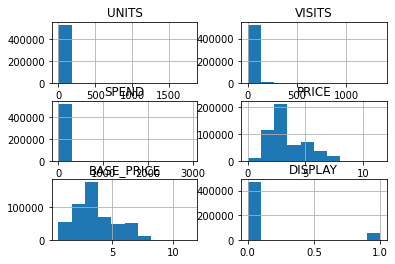

In [48]:
vendas[['UNITS','VISITS','SPEND','PRICE','BASE_PRICE','DISPLAY']].hist()

### **Combinando os DataSets para gerar visualizações**

In [258]:
tudo_junto = vendas.merge(produtos, on='UPC').merge(lojas, how='outer', on='STORE_ID')
tudo_junto.to_csv('tudo_junto.csv')
tudo_junto.head()

,WEEK_END_DATE,STORE_ID,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,2009-01-14,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12706.532051
1,2009-01-21,367,1111009477,24,23,23,33.36,1.39,1.57,0,0,1,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12706.532051
2,2009-01-28,367,1111009477,7,7,7,9.52,1.36,1.36,0,0,0,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12706.532051
3,2009-02-04,367,1111009477,12,12,12,16.56,1.38,1.38,0,0,0,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12706.532051
4,2009-02-11,367,1111009477,16,14,14,24.00,1.50,1.50,0,0,0,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12706.532051


### **Data do Final da semana**


In [ ]:
sortedWED=transaction.WEEK_END_DATE.value_counts(sort=False).reset_index().sort_values('index').set_index('index')


In [246]:
datas = tudo_junto.WEEK_END_DATE.value_counts(sort=False).reset_index().sort_values('index').set_index('index')
#separamos a frequência das datas, colocamos a data como index e foi rdenada em ondem crescente e setada como index
datas.head()

,WEEK_END_DATE
index,
2009-01-14,3241
2009-01-21,3213
2009-01-28,3216
2009-02-04,3205
2009-02-11,3170


Text(0.5, 1.0, 'Datas')

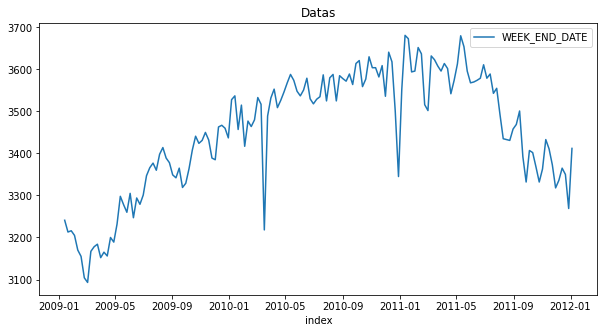

In [254]:
fig, eixo = plt.subplots(figsize=(10,5))

sns.lineplot(data=datas)
plt.title("Datas")

### **Unidades Vendidas**

Text(0.5, 1.0, 'Unidades Vendidas por Categoria de Produtos')

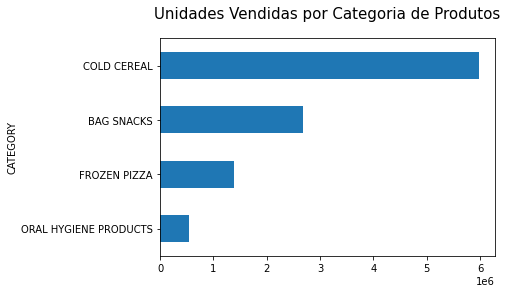

In [271]:
unidades_categoria = tudo_junto.groupby('CATEGORY')['UNITS'].sum()
unidades_categoria.sort_values().plot(kind='barh')
plt.title('Unidades Vendidas por Categoria de Produtos', fontsize='15', pad=20)

In [392]:
tudo_junto.CATEGORY.unique()

array(['BAG SNACKS', 'ORAL HYGIENE PRODUCTS', 'COLD CEREAL',
       'FROZEN PIZZA'], dtype=object)

Text(0, 0.5, 'Unidades')

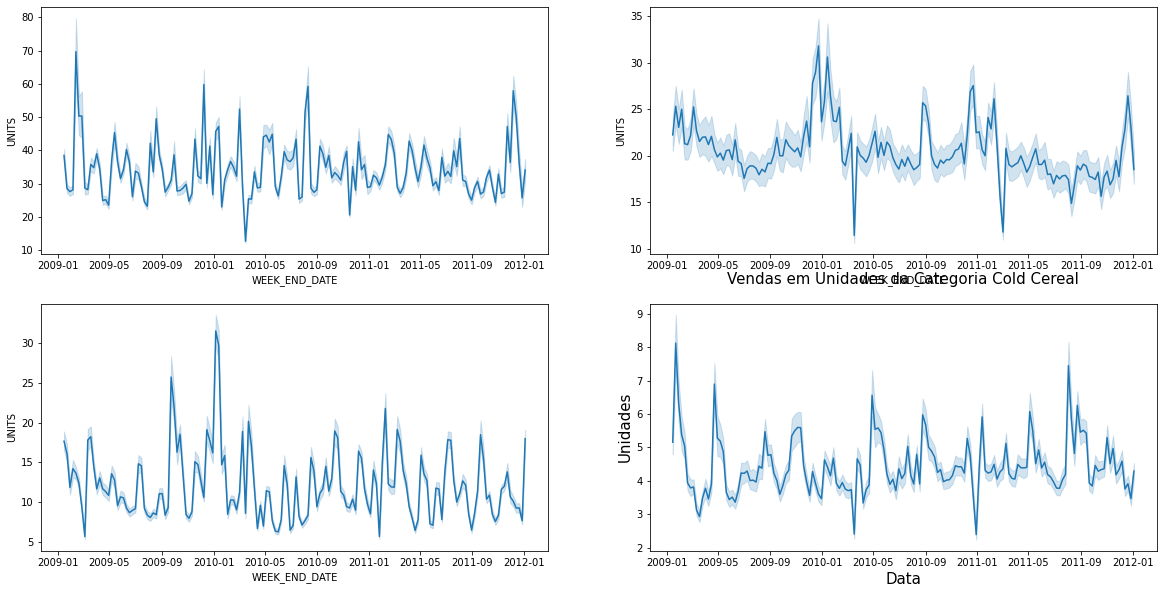

In [393]:
fig, eixo  = plt.subplots(2,2,figsize=(20,10))

z =tudo_junto.query("CATEGORY == 'COLD CEREAL' ")[['WEEK_END_DATE','UNITS',]].sort_values(by='WEEK_END_DATE')
sns.lineplot(x='WEEK_END_DATE',y='UNITS', data=z, ax=eixo[0,0])
plt.title('Vendas em Unidades da Categoria Cold Cereal', fontsize=15, pad=20)
plt.xlabel('Data', fontsize='15')
plt.ylabel('Unidades', fontsize=15)

z =tudo_junto.query("CATEGORY == 'BAG SNACKS' ")[['WEEK_END_DATE','UNITS',]].sort_values(by='WEEK_END_DATE')
sns.lineplot(x='WEEK_END_DATE',y='UNITS', data=z, ax=eixo[0,1])
plt.title('Vendas em Unidades da Categoria Cold Cereal', fontsize=15, pad=20)
plt.xlabel('Data', fontsize='15')
plt.ylabel('Unidades', fontsize=15)

z =tudo_junto.query("CATEGORY == 'FROZEN PIZZA' ")[['WEEK_END_DATE','UNITS',]].sort_values(by='WEEK_END_DATE')
sns.lineplot(x='WEEK_END_DATE',y='UNITS', data=z, ax=eixo[1,0])
plt.title('Vendas em Unidades da Categoria Cold Cereal', fontsize=15, pad=20)
plt.xlabel('Data', fontsize='15')
plt.ylabel('Unidades', fontsize=15)

z =tudo_junto.query("CATEGORY == 'ORAL HYGIENE PRODUCTS' ")[['WEEK_END_DATE','UNITS',]].sort_values(by='WEEK_END_DATE')
sns.lineplot(x='WEEK_END_DATE',y='UNITS', data=z, ax=eixo[1,1])
plt.title('Vendas em Unidades da Categoria Cold Cereal', fontsize=15, pad=20)
plt.xlabel('Data', fontsize='15')
plt.ylabel('Unidades', fontsize=15)